### NAME: Tarun Dadlani
### CWID: 20010209
### Class: CS513B
### Midterm Q5

In [33]:
# read breast cancer dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [34]:
dataset = pd.read_csv('BP.csv')
dataset = dataset.replace("?", np.NaN)  # replace "?" with NaN
dataset["BP_Status"] = dataset["BP_Status"].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4403 entries, 0 to 4402
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Somker     4403 non-null   object  
 1   Gender     4403 non-null   object  
 2   Age        4403 non-null   int64   
 3   Height     4403 non-null   float64 
 4   Weight     4403 non-null   int64   
 5   BP_Status  4403 non-null   category
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 176.5+ KB


In [35]:
# Split the data into training and testing sets
X = dataset.drop('BP_Status', axis=1)
y = dataset['BP_Status']

In [36]:
# converting somker and gender to encode to numeric values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Somker', 'Gender'])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [37]:
# using labelencoding
le = LabelEncoder()
y = le.fit_transform(y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [39]:
# Standardizing data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
# Train the model
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)

In [41]:
print("Classification Report: \n")
print(classification_report(y_test, y_pred), end="\n")
print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'\nAccuracy: {accuracy_score(y_test, y_pred)}')

Classification Report: 

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       662
           1       0.63      0.60      0.61       659

    accuracy                           0.62      1321
   macro avg       0.62      0.62      0.62      1321
weighted avg       0.62      0.62      0.62      1321


Confusion Matrix:
[[428 234]
 [265 394]]

Accuracy: 0.6222558667676003


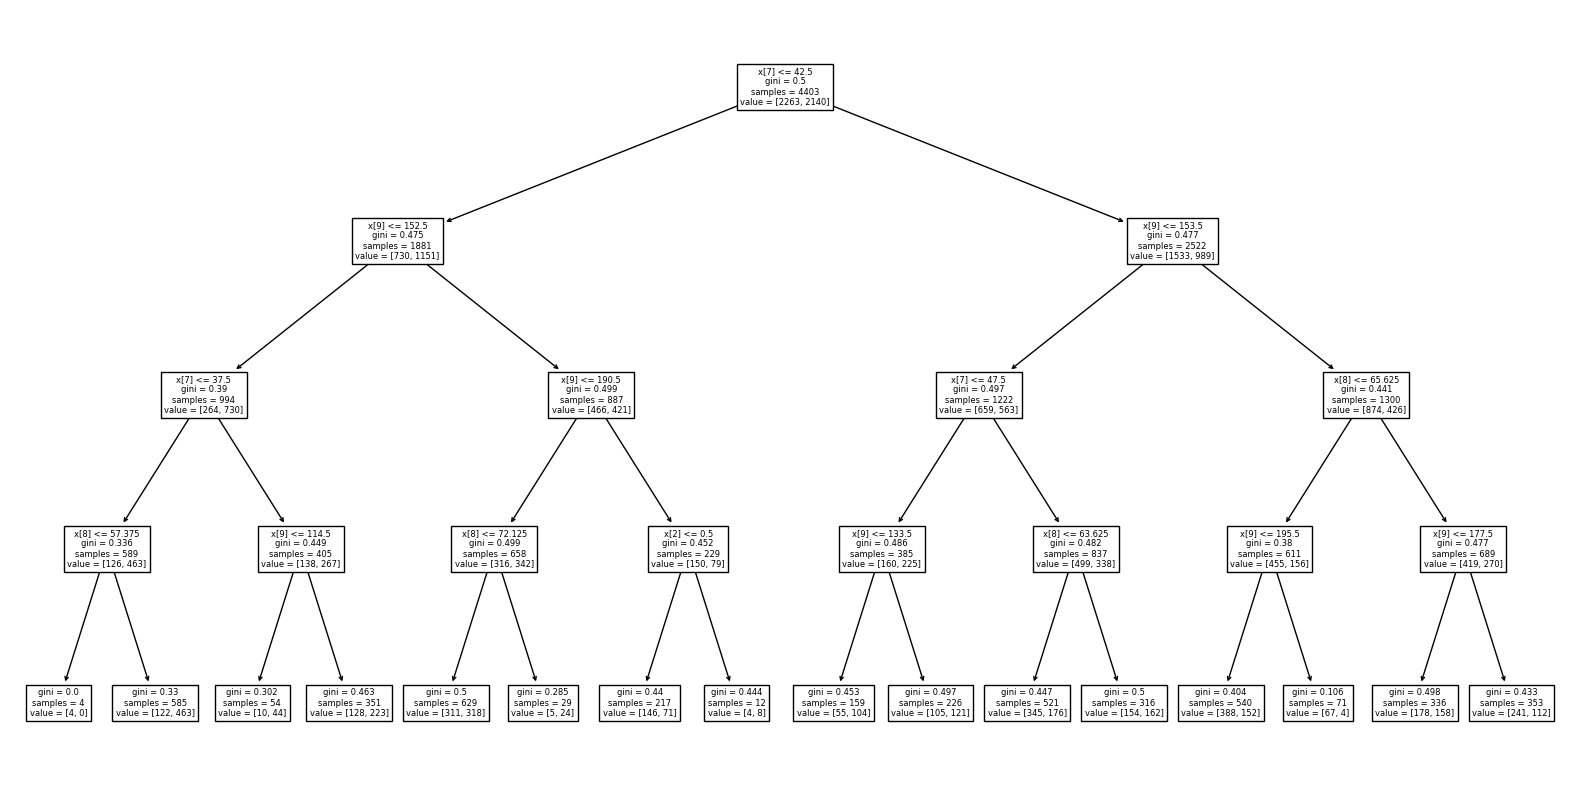

In [42]:
plt.figure(figsize=(20, 10))
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=4)
clf = clf.fit(X, y)
tree.plot_tree(clf)
plt.show()